In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('gender_age_train.csv')
test = pd.read_csv('gender_age_test.csv')
app_events = pd.read_csv('app_events.csv')
app_labels = pd.read_csv('app_labels.csv')
events = pd.read_csv('events.csv', parse_dates=['timestamp'])
categories = pd.read_csv('label_categories.csv')
phone = pd.read_csv('phone_brand_device_model.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null int64
gender       74645 non-null object
age          74645 non-null int64
group        74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [13]:
train.head(20)

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31
5,-1297074871525174196,F,24,F24-26
6,236877999787307864,M,36,M32-38
7,-8098239495777311881,M,38,M32-38
8,176515041953473526,M,33,M32-38
9,1596610250680140042,F,36,F33-42


In [5]:
train.describe()

,device_id,age
count,7.464500e+04,74645.000000
mean,-7.491354e+14,31.410342
std,5.327150e+18,9.868735
min,-9.223067e+18,1.000000
25%,-4.617367e+18,25.000000
50%,-1.841362e+16,29.000000
75%,4.636656e+18,36.000000
max,9.222849e+18,96.000000


In [6]:
#how many device ids?
len(train.device_id.unique())

74645

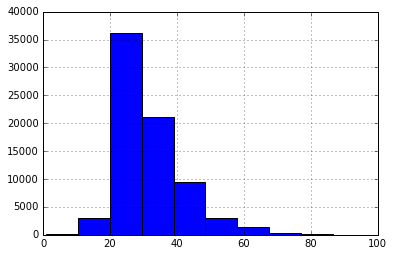

In [13]:
#look into age
train.age.hist()

In [14]:
train.age.value_counts()

26    4540
27    4476
29    4343
28    4087
25    3740
30    3730
24    3501
23    3115
22    3018
31    2996
21    2994
32    2641
34    2586
33    2481
20    2349
35    2014
37    1621
19    1612
36    1602
38    1357
39    1247
40    1170
42    1029
41    1026
43     989
46     937
44     922
45     867
18     758
47     665
      ... 
71      46
72      36
14      35
70      30
74      27
76      26
75      23
73      18
13      15
80      14
12      14
77      13
79      13
78      13
83      11
81      10
88       5
10       5
11       4
86       4
6        4
85       3
89       3
87       3
84       2
82       2
90       1
96       1
1        1
94       1
Name: age, dtype: int64

In [15]:
train.group.value_counts()

M23-26    9605
M32-38    9476
M39+      8581
M22-      7488
M29-31    7309
F33-42    5561
M27-28    5445
F23-      5050
F29-32    4628
F43+      4194
F24-26    4190
F27-28    3118
Name: group, dtype: int64

In [16]:
train.gender.value_counts()

M    47904
F    26741
Name: gender, dtype: int64

# Wow! users are highly skewed towards being male.

# app_events

In [20]:
app_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32473067 entries, 0 to 32473066
Data columns (total 4 columns):
event_id        int64
app_id          int64
is_installed    int64
is_active       int64
dtypes: int64(4)
memory usage: 991.0 MB


In [21]:
app_events.head()

,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1


In [22]:
app_events.describe()

,event_id,app_id,is_installed,is_active
count,3.247307e+07,3.247307e+07,32473067.0,3.247307e+07
mean,1.625564e+06,1.182779e+18,1.0,3.921094e-01
std,9.384682e+05,5.360173e+18,0.0,4.882209e-01
min,2.000000e+00,-9.221157e+18,1.0,0.000000e+00
25%,8.134720e+05,-3.474568e+18,1.0,0.000000e+00
50%,1.626907e+06,1.387044e+18,1.0,0.000000e+00
75%,2.441106e+06,6.043001e+18,1.0,1.000000e+00
max,3.252948e+06,9.222488e+18,1.0,1.000000e+00


In [19]:
app_events.event_id.value_counts()

3215932    320
1827617    304
2849072    304
2325136    303
3085011    303
1923040    303
2805295    302
2679507    302
2412744    302
1160746    300
2990638    299
219629     298
956087     298
2328996    297
2989536    261
2204686    261
1472406    261
649636     261
2932987    261
2470660    261
2573741    261
1801966    261
1598158    261
1324254    261
1874044    261
2826735    261
2227905    261
2084776    255
79641      254
1359558    251
          ... 
2682884      1
2597984      1
1247580      1
2745773      1
914594       1
2568701      1
745980       1
1385012      1
635946       1
1032734      1
3207938      1
1270524      1
2182932      1
2887356      1
2273610      1
1778676      1
2450492      1
574206       1
2729380      1
1210197      1
407005       1
1155749      1
193861       1
1893133      1
13597        1
898221       1
936692       1
985820       1
2319613      1
575841       1
Name: event_id, dtype: int64

In [20]:
len(app_events.event_id.unique())

1488096

In [6]:
app_counts = app_events.app_id.value_counts()

In [22]:
len(app_events.app_id.unique())

19237

In [11]:
len(app_counts[app_counts > 10000])

535

# app_labels

In [23]:
app_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459943 entries, 0 to 459942
Data columns (total 2 columns):
app_id      459943 non-null int64
label_id    459943 non-null int64
dtypes: int64(2)
memory usage: 7.0 MB


In [24]:
app_labels.head()

,app_id,label_id
0,7324884708820027918,251
1,-4494216993218550286,251
2,6058196446775239644,406
3,6058196446775239644,407
4,8694625920731541625,406


In [26]:
app_labels.label_id.value_counts()

548    56902
405    53936
794    49320
795    48707
704    45697
714    19083
713    11840
854     9955
710     9027
711     8831
796     7375
810     7052
721     5910
800     5147
811     5135
813     5124
730     4619
798     3608
857     2723
870     2582
812     2496
777     2471
805     2353
802     2327
549     2243
251     2208
803     2162
783     2028
797     1972
756     1955
       ...  
692        3
990        3
989        3
988        3
986        3
218        2
242        2
216        2
174        2
173        2
924        2
735        2
249        2
563        1
4          1
41         1
763        1
2          1
553        1
21         1
246        1
244        1
265        1
199        1
921        1
155        1
270        1
696        1
48         1
146        1
Name: label_id, dtype: int64

In [27]:
len(app_labels.label_id.unique())

507

In [26]:
len(app_labels.app_id.unique())

113211

In [27]:
app_labels.app_id.value_counts()

 6792270137491452041    26
-4550209074213737101    23
 33792862810792679      20
 7334124244583991496    20
 1321978891423004894    20
 2004030030916210247    19
 1001398498434380294    19
-4577196685860147270    19
-4581899107652088128    19
 8748186572227813281    18
-653184325026622087     18
-5839858269967688123    18
 7488171461387766536    18
-2750216768115026646    18
 1512106437929874965    18
 7310940964635812162    18
 1886578604601590220    18
-4020518904248117295    18
-5114610257339534663    18
 7875772580533910613    18
-1633958535834641769    18
-1633953515196607839    18
 1081301425634924658    18
 9211954271534258460    18
 5500110771702611013    18
-9050100410106163077    18
 8845251844360692488    18
 8026407831917254841    18
-4005790770255598286    18
-3876583918535716275    17
                        ..
 7596333339626096573     1
-3847886588935930241     1
 6229172628559903352     1
-961867029239375825      1
-6099801646020592874     1
-849611159005828488      1
-

In [28]:
app_labels[app_labels.app_id == 6792270137491452041]

,app_id,label_id
3371,6792270137491452041,549
48124,6792270137491452041,713
88419,6792270137491452041,704
139399,6792270137491452041,761
139444,6792270137491452041,757
142628,6792270137491452041,787
142650,6792270137491452041,783
145971,6792270137491452041,777
146006,6792270137491452041,775
149325,6792270137491452041,782


# Events

In [4]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 5 columns):
event_id     int64
device_id    int64
timestamp    datetime64[ns]
longitude    float64
latitude     float64
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 124.1 MB


In [47]:
events.head()

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


In [51]:
events.timestamp.dt.hour

0           0
1           0
2           0
3           0
4           0
5           0
6           0
7           0
8           0
9           0
10          0
11          0
12          0
13          0
14          0
15          0
16          0
17          0
18          0
19          0
20          0
21          0
22         23
23         23
24         23
25          0
26          0
27          0
28          0
29          0
           ..
3252920    23
3252921    22
3252922    23
3252923    22
3252924    22
3252925    23
3252926    23
3252927    23
3252928    23
3252929    23
3252930    23
3252931    23
3252932    23
3252933    23
3252934    23
3252935    23
3252936    23
3252937    23
3252938    23
3252939    23
3252940    23
3252941    22
3252942    23
3252943    23
3252944    23
3252945    23
3252946    23
3252947    23
3252948    23
3252949    23
Name: timestamp, dtype: int64

In [52]:
print(events.timestamp.min())
print(events.timestamp.max())

2016-04-30 23:52:24
2016-05-08 00:00:08


In [33]:
events.describe()

,event_id,device_id,longitude,latitude
count,3.252950e+06,3.252950e+06,3.252950e+06,3.252950e+06
mean,1.626476e+06,-2.685140e+16,7.796192e+01,2.162949e+01
std,9.390459e+05,5.301236e+18,5.405801e+01,1.569697e+01
min,1.000000e+00,-9.222957e+18,-1.800000e+02,-3.843000e+01
25%,8.132382e+05,-4.616259e+18,0.000000e+00,0.000000e+00
50%,1.626476e+06,-1.729953e+16,1.129500e+02,2.802000e+01
75%,2.439713e+06,4.549750e+18,1.172100e+02,3.407000e+01
max,3.252950e+06,9.222540e+18,1.747600e+02,5.994000e+01


In [29]:
events.device_id.value_counts()

 1186608308763918427    33426
 3915082290673137129    14568
-1656894751624916732     6731
-6242501228649113250     4150
-8340098378141155823     3973
-3746248670824158209     3907
 2504414082456157897     3804
-3037377082444295812     3534
-17299534936664237       3506
-7369693784883843916     3446
 8339429008953975436     3440
 5083019926611946481     3395
 5375599021847302819     3128
-5105332332397066846     3099
 2771516290634663640     2975
 6093002121756678917     2956
-4272349824279327690     2941
 4782582047729166353     2899
 5412535611892404899     2890
 6752290732094543435     2784
 1779631023439405334     2757
 5098778421671837341     2722
-4408024234436488510     2625
 6871174750645130490     2609
-6470609369540549852     2522
-7295456045290839743     2364
 3724654925765159056     2347
-6875585507485886098     2310
-563333606900826189      2174
-7335675747890320104     2124
                        ...  
-9181738358000344093        1
 7806298636210591786        1
-865713719

In [4]:
len(events.device_id.unique())

60865

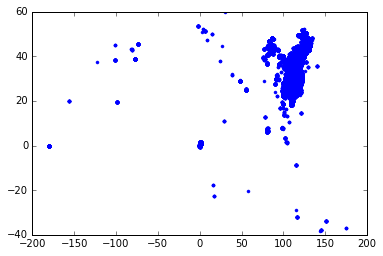

In [41]:
plt.plot(events.longitude[:1000000], events.latitude[:1000000], '.')

# Categories

In [3]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 2 columns):
label_id    930 non-null int64
category    927 non-null object
dtypes: int64(1), object(1)
memory usage: 14.6+ KB


In [4]:
categories.head()

,label_id,category
0,1,NaN
1,2,game-game type
2,3,game-Game themes
3,4,game-Art Style
4,5,game-Leisure time


In [29]:
categories.describe()

,label_id
count,930.000000
mean,517.080645
std,297.858790
min,1.000000
25%,251.250000
50%,523.500000
75%,778.750000
max,1021.000000


In [30]:
len(categories.label_id.unique())

930

In [31]:
categories.head(20)

,label_id,category
0,1,NaN
1,2,game-game type
2,3,game-Game themes
3,4,game-Art Style
4,5,game-Leisure time
5,6,game-Cutting things
6,7,game-Finding fault
7,8,game-stress reliever
8,9,game-pet
9,10,game-Answer


# Phone

In [3]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187245 entries, 0 to 187244
Data columns (total 3 columns):
device_id       187245 non-null int64
phone_brand     187245 non-null object
device_model    187245 non-null object
dtypes: int64(1), object(2)
memory usage: 4.3+ MB


In [4]:
phone.head()

,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2


In [9]:
phone.phone_brand.value_counts()

小米      43210
三星      34286
华为      32564
vivo    14395
OPPO    14289
魅族      11853
酷派       8407
联想       6761
金立       2768
HTC      2682
中兴       2096
乐视       1930
索尼       1821
努比亚      1144
LG        763
中国移动      671
TCL       586
朵唯        544
锤子        535
优米        492
海信        489
一加        438
语信        396
奇酷        378
天语        376
摩托罗拉      228
酷比        165
ZUK       153
酷比魔方      152
美图        151
        ...  
优语          5
欧乐迪         5
唯比          4
惠普          4
宝捷讯         4
本为          4
天宏时代        4
丰米          3
鲜米          3
大显          3
恒宇丰         2
世纪星         2
赛博宇华        2
戴尔          2
原点          2
凯利通         2
MIL         2
飞秒          2
E人E本        1
ZOYE        1
瑞高          1
碟米          1
欧乐酷         1
西门子         1
帷幄          1
亚马逊         1
德卡诺         1
嘉源          1
极米          1
宏碁          1
Name: phone_brand, dtype: int64

In [11]:
len(phone.phone_brand.unique())

131

In [3]:
models = phone.device_model.value_counts()
models.describe()

count    1599.000000
mean      117.101313
std       439.583161
min         1.000000
25%         5.000000
50%        15.000000
75%        57.500000
max      7358.000000
Name: device_model, dtype: float64

In [10]:
len(models[models > 300])

121

In [3]:
len(phone.device_model.unique())

1599

In [4]:
#phone['combo'] = phone.apply(lambda x: ' '.join(x[['phone_brand', 'device_model']]))
phone['combo'] = phone.phone_brand.str.cat(phone.device_model)
len(phone['combo'].value_counts())
models = phone.combo.value_counts()
len(models[models > 100])

288

In [5]:
#check to see if some of the phones' demographic breakdowns are different from average

train_phone = train.merge(phone, on='device_id')
train_phone.head()

,device_id,gender,age,group,phone_brand,device_model,combo
0,-8076087639492063270,M,35,M32-38,小米,MI 2,小米MI 2
1,-2897161552818060146,M,35,M32-38,小米,MI 2,小米MI 2
2,-8260683887967679142,M,35,M32-38,小米,MI 2,小米MI 2
3,-4938849341048082022,M,30,M29-31,小米,红米note,小米红米note
4,245133531816851882,M,30,M29-31,小米,MI 3,小米MI 3


In [6]:
phonegroups = train_phone.groupby('combo').filter(lambda x: len(x) > 100)

phonegroups.head(10)

,device_id,gender,age,group,phone_brand,device_model,combo
0,-8076087639492063270,M,35,M32-38,小米,MI 2,小米MI 2
1,-2897161552818060146,M,35,M32-38,小米,MI 2,小米MI 2
2,-8260683887967679142,M,35,M32-38,小米,MI 2,小米MI 2
3,-4938849341048082022,M,30,M29-31,小米,红米note,小米红米note
4,245133531816851882,M,30,M29-31,小米,MI 3,小米MI 3
5,-1297074871525174196,F,24,F24-26,OPPO,R1C,OPPOR1C
6,236877999787307864,M,36,M32-38,酷派,F2,酷派F2
7,-8098239495777311881,M,38,M32-38,小米,红米note,小米红米note
8,176515041953473526,M,33,M32-38,vivo,X3T,vivoX3T
9,1596610250680140042,F,36,F33-42,三星,Galaxy S4,三星Galaxy S4


In [14]:
phonegroupbreakdown = phonegroups.groupby(['combo', 'group'])[['device_id']].count()
phonegroupbreakdown.head(20)

device_id
combo         group            
HTCDesire 816 F23-           17
              F24-26         13
              F27-28          3
              F29-32          9
              F33-42         14
              F43+            7
              M22-           31
              M23-26         23
              M27-28          8
              M29-31         23
              M32-38         33
              M39+           21
HTCOne        F23-            9
              F24-26          3
              F29-32         11
              F33-42          3
              F43+           18
              M22-           14
              M23-26         30
              M27-28         11

In [16]:
phonegrouppcts = phonegroupbreakdown.groupby(level=0).apply(lambda x: 100*x/x.sum())
phonegrouppcts

device_id
combo         group            
HTCDesire 816 F23-     8.415842
              F24-26   6.435644
              F27-28   1.485149
              F29-32   4.455446
              F33-42   6.930693
              F43+     3.465347
              M22-    15.346535
              M23-26  11.386139
              M27-28   3.960396
              M29-31  11.386139
              M32-38  16.336634
              M39+    10.396040
HTCOne        F23-     5.806452
              F24-26   1.935484
              F29-32   7.096774
              F33-42   1.935484
              F43+    11.612903
              M22-     9.032258
              M23-26  19.354839
              M27-28   7.096774
              M29-31  15.483871
              M32-38  12.258065
              M39+     8.387097
OPPO1107      F23-    12.903226
              F24-26   4.032258
              F27-28   4.838710
              F29-32   4.032258
              F33-42   9.677419
              F43+     4.032258
              M22-    16.129032
...                         ...
魅族魅蓝NOTE      M22-    18.386714
              M23-26  16.963227
              M27-28   7.591934
              M29-31   8.659549
              M32-38  12.811388
              M39+     6.880190
魅族魅蓝Note 2    F23-     8.321377
              F24-26   5.595409
              F27-28   4.017217
              F29-32   5.882353
              F33-42   3.730273
              F43+     4.017217
              M22-    18.364419
              M23-26  15.925395
              M27-28   9.182209
              M29-31   9.325681
              M32-38  10.329986
              M39+     5.308465
魅族魅蓝metal     F23-     5.612245
              F24-26   4.081633
              F27-28   2.551020
              F29-32   3.571429
              F33-42   4.081633
              F43+     2.551020
              M22-    16.836735
              M23-26  25.510204
              M27-28  12.244898
              M29-31   8.673469
              M32-38  10.714286
              M39+     3.571429

[1639 rows x 1 columns]

In [17]:
phonegrouppctstable = phonegrouppcts.reset_index().pivot(index='group', columns='combo')
phonegrouppctstable

device_id                                                         \
combo  HTCDesire 816     HTCOne   OPPO1107    OPPOA31    OPPOA33 OPPOFind 5   
group                                                                         
F23-        8.415842   5.806452  12.903226   9.963100   9.734513   8.196721   
F24-26      6.435644   1.935484   4.032258   7.380074   6.194690  10.655738   
F27-28      1.485149        NaN   4.838710   3.690037   4.424779   3.688525   
F29-32      4.455446   7.096774   4.032258   9.225092  10.619469   5.327869   
F33-42      6.930693   1.935484   9.677419   7.380074   6.194690   7.377049   
F43+        3.465347  11.612903   4.032258   2.583026   7.964602   6.967213   
M22-       15.346535   9.032258  16.129032  13.653137  13.274336   6.967213   
M23-26     11.386139  19.354839  11.290323   9.963100   7.964602  13.114754   
M27-28      3.960396   7.096774   6.451613   5.904059   6.194690   8.196721   
M29-31     11.386139  15.483871   7.258065  12.546125   8.849558  13.114754   
M32-38     16.336634  12.258065   9.677419  11.070111   8.849558   9.016393   
M39+       10.396040   8.387097   9.677419   6.642066   9.734513   7.377049   

                                                       ...                 \
combo  OPPOFind 7 OPPON1 Mini    OPPON1T     OPPOR1    ...          魅族MX2   
group                                                  ...                  
F23-     7.831325   26.623377   8.849558  14.754098    ...       4.851752   
F24-26   3.012048   14.935065  11.504425   5.737705    ...       8.625337   
F27-28   4.518072   10.389610   3.539823   2.459016    ...       3.504043   
F29-32   5.120482    6.493506  11.504425   2.459016    ...       4.851752   
F33-42   7.228916    7.792208  11.504425   9.016393    ...       3.234501   
F43+     3.915663    1.948052   3.539823   1.639344    ...       4.043127   
M22-    12.048193    7.792208   2.654867   9.836066    ...       9.703504   
M23-26  13.855422    8.441558  15.929204  11.475410    ...      25.336927   
M27-28   6.626506    4.545455   6.194690  11.475410    ...      11.320755   
M29-31  11.445783    3.896104   6.194690  12.295082    ...       9.973046   
M32-38  12.349398    3.896104   9.734513   9.016393    ...       8.894879   
M39+    12.048193    3.246753   8.849558   9.836066    ...       5.660377   

                                                                        \
combo       魅族MX3      魅族MX4  魅族MX4 Pro      魅族MX5       魅族魅蓝    魅族魅蓝2   
group                                                                    
F23-     7.079646   5.891720   4.430380   7.648725  12.707182   8.1250   
F24-26   7.374631   4.140127   5.379747   3.682720   4.972376   7.1875   
F27-28   3.982301   4.617834   3.481013   2.266289   1.657459   2.8125   
F29-32   5.014749   3.821656   1.582278   3.682720   4.972376   3.7500   
F33-42   4.719764   3.503185   3.164557   2.266289   4.419890   5.0000   
F43+     3.244838   3.821656   1.265823   1.983003   4.419890   4.0625   
M22-    16.519174  17.515924  18.670886  25.779037  16.022099  18.7500   
M23-26  22.713864  20.063694  20.569620  22.379603  22.099448  17.5000   
M27-28   8.849558   9.076433  14.556962   8.215297   9.392265   7.1875   
M29-31   8.554572  11.305732  11.392405  10.481586   7.182320  10.6250   
M32-38   7.374631   8.121019   9.177215   7.648725   5.524862   8.1250   
M39+     4.572271   8.121019   6.329114   3.966006   6.629834   6.8750   

                                         
combo    魅族魅蓝NOTE 魅族魅蓝Note 2  魅族魅蓝metal  
group                                    
F23-     7.117438   8.321377   5.612245  
F24-26   4.626335   5.595409   4.081633  
F27-28   5.219454   4.017217   2.551020  
F29-32   4.389087   5.882353   3.571429  
F33-42   4.033215   3.730273   4.081633  
F43+     3.321471   4.017217   2.551020  
M22-    18.386714  18.364419  16.836735  
M23-26  16.963227  15.925395  25.510204  
M27-28   7.591934   9.182209  12.244898  
M29-31   8.659549   9.325681   8.673469  
M32-38  12.8